In [1]:
import pandas as pd


df = pd.read_csv('Protein_Consumption.csv', sep=';',
                 decimal=',',
                 index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Yugoslavia
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RedMeat    25 non-null     float64
 1   WhiteMeat  25 non-null     float64
 2   Eggs       25 non-null     float64
 3   Milk       25 non-null     float64
 4   Fish       25 non-null     float64
 5   Cereals    25 non-null     float64
 6   Starch     25 non-null     float64
 7   Nuts       25 non-null     float64
 8   Fr&Veg     25 non-null     float64
dtypes: float64(9)
memory usage: 2.0+ KB


In [3]:
df.index

Index(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Czechoslovakia',
       'Denmark', 'E_Germany', 'Finland', 'France', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'Switzerland', 'UK', 'USSR', 'W_Germany',
       'Yugoslavia'],
      dtype='object', name='Country')

In [6]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
# stand_1 = preprocessing.MaxAbsScaler()
# stand_1 = preprocessing.MinMaxScaler()
stand.fit(df)
X = stand.transform(df)
X = pd.DataFrame(X, index=df.index, columns=df.columns)

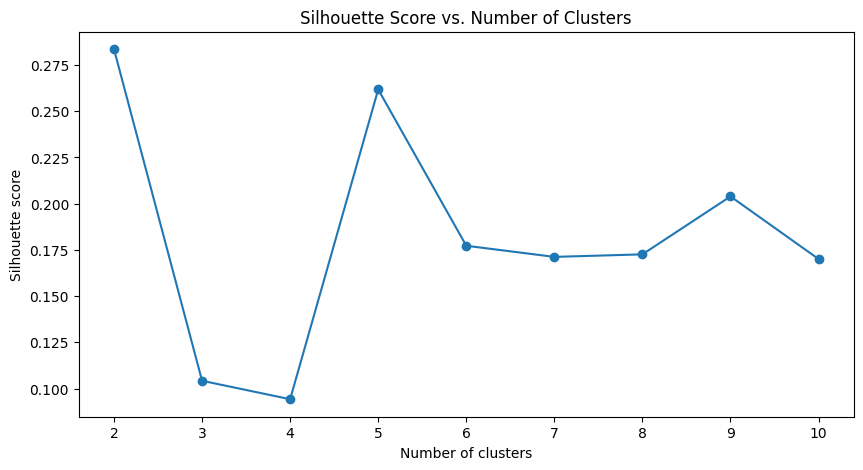

In [7]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming X is your data and has the index you want to display
# Perform hierarchical clustering
Z = hierarchy.linkage(X, method='single')

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):  # Assuming you want to consider 2 to 10 clusters
    clusters = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_scores.append(silhouette_score(X, clusters))

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


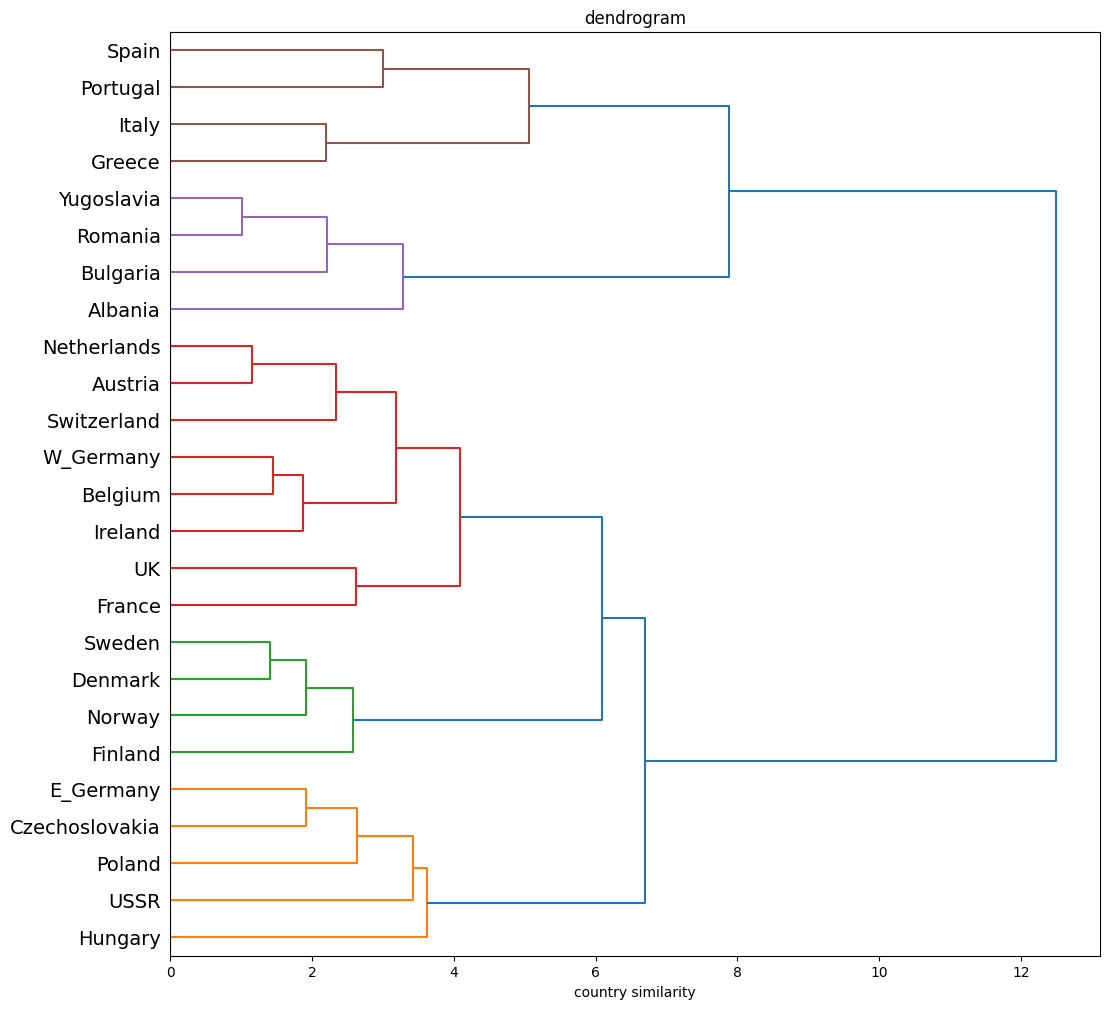

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('country similarity')

ax1.set_title('dendrogram')
dn = dendrogram(link,
                # Names of objects to be marked along the X-axis;
                labels=X.index.tolist(),
                leaf_font_size = 14,
                # Option to clearly display an overbranched dendrogram;
                truncate_mode='lastp',
                color_threshold=5.5,
                # Rotate vertically
                orientation = "right",
                leaf_rotation=0.)

plt.savefig('dendro_3ex.png', dpi=300, facecolor = 'white')

In [18]:
clusters=fcluster(link,5.5, criterion='distance')

In [19]:
# Create lists for each cluster
cluster_lists = {}
for label, cluster in zip(X.index.tolist(), clusters):
    if cluster not in cluster_lists:
        cluster_lists[cluster] = []
    cluster_lists[cluster].append(label)

# Print the lists
for cluster, labels in cluster_lists.items():
    print(f"Cluster {cluster}: {labels}")

Cluster 4: ['Albania', 'Bulgaria', 'Romania', 'Yugoslavia']
Cluster 3: ['Austria', 'Belgium', 'France', 'Ireland', 'Netherlands', 'Switzerland', 'UK', 'W_Germany']
Cluster 1: ['Czechoslovakia', 'E_Germany', 'Hungary', 'Poland', 'USSR']
Cluster 2: ['Denmark', 'Finland', 'Norway', 'Sweden']
Cluster 5: ['Greece', 'Italy', 'Portugal', 'Spain']
